In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
print(cv2.__version__)

4.5.5


(350, 700, 3)


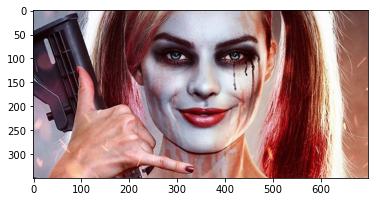

(175, 350, 3)


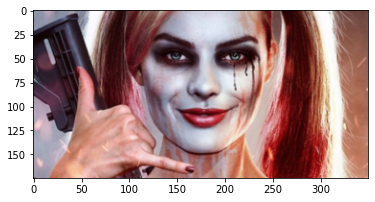

In [13]:
img = cv2.imread('black.jpg').astype('float32')
print(img.shape)

scale_factor = 255.0/np.max(img)
img = cv2.convertScaleAbs(img, alpha=scale_factor)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()

######################### pyrDown ########################################
down = cv2.pyrDown(img)
print(down.shape)

scale_factor = 255.0/np.max(down)
down = cv2.convertScaleAbs(down, alpha=scale_factor)
down_RGB = cv2.cvtColor(down, cv2.COLOR_BGR2RGB)
plt.imshow(down_RGB)
plt.show()

levels: 4
shape of 0th layer: (350, 700, 3)


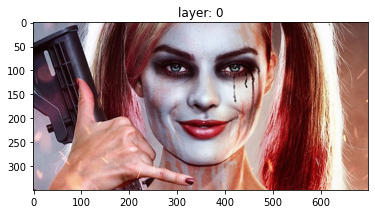

shape of 1th layer: (175, 350, 3)


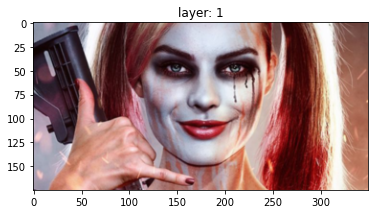

shape of 2th layer: (88, 175, 3)


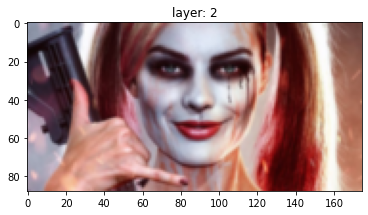

shape of 3th layer: (44, 88, 3)


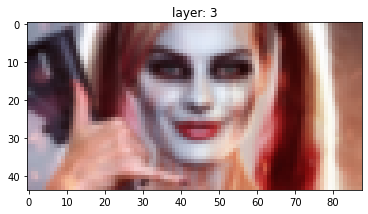

In [14]:
######################### function: buildGaussianPyramid ##########################################
def buildGaussianPyramid(src, maxVals):
    layer = src.copy()
    g_pyr = [layer]
    for i in range(maxVals-1):
        layer = cv2.pyrDown(layer)
        g_pyr.append(layer)
    return g_pyr

######################### usage ##########################################
img = cv2.imread('black.jpg').astype('float32')    ## important!!!!!!!!!!!!!!!!!!!

maxVals = 4
g_pyr = buildGaussianPyramid(img, maxVals)
print('levels: ' + str(len(g_pyr)))

######################### plot ##########################################
for i in range(maxVals):
    layer = g_pyr[i]
    
    print('shape of {}th layer: {}'.format(i, layer.shape))

    scale_factor = 255.0/np.max(layer)
    layer = cv2.convertScaleAbs(layer, alpha=scale_factor)
    layer = cv2.cvtColor(layer, cv2.COLOR_BGR2RGB)
    
    plt.title('layer: '+str(i))
    plt.imshow(layer)
    plt.show()

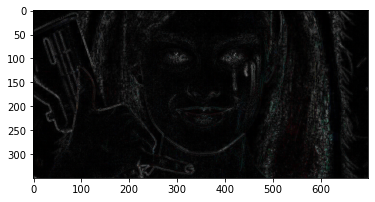

In [15]:
G0 = cv2.imread('black.jpg').astype('float32')
G1 = cv2.pyrDown(G0)
L0 = G0 - cv2.pyrUp(G1)

scale_factor = 255.0/np.max(L0)
L0 = cv2.convertScaleAbs(L0, alpha=scale_factor)
L0_rgb = cv2.cvtColor(L0, cv2.COLOR_BGR2RGB)
plt.imshow(L0_rgb)
plt.show()

(6, 6)


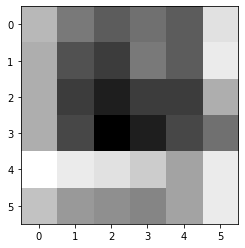

[[34. 28. 25. 27. 25. 38.]
 [33. 24. 22. 28. 25. 39.]
 [33. 22. 19. 22. 22. 33.]
 [33. 23. 16. 19. 23. 27.]
 [41. 39. 38. 36. 32. 39.]
 [35. 31. 30. 29. 32. 39.]]


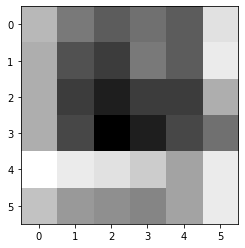

[[34. 28. 25. 27. 25. 38.]
 [33. 24. 22. 28. 25. 39.]
 [33. 22. 19. 22. 22. 33.]
 [33. 23. 16. 19. 23. 27.]
 [41. 39. 38. 36. 32. 39.]
 [35. 31. 30. 29. 32. 39.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [16]:
img = cv2.imread('black.jpg', 0).astype('float32')
G0 = img[100:106,200:206]
print(G0.shape)

plt.imshow(G0, 'gray')
plt.show()

print(G0)

######################### pyrDown ########################################
G1 = cv2.pyrDown(G0)
G2 = cv2.pyrDown(G1)

######################### laplacian ########################################
size = (G1.shape[1], G1.shape[0])
#L1 = cv2.subtract(G1, cv2.pyrUp(G2, dstsize=size))
L1 = G1 - cv2.pyrUp(G2, dstsize=size)

size = (G0.shape[1], G0.shape[0])
#L0 = cv2.subtract(G0, cv2.pyrUp(G1, dstsize=size))
L0 = G0 - cv2.pyrUp(G1, dstsize=size)

######################### reconstruction ########################################
size = (L1.shape[1], L1.shape[0])
#reconst = cv2.add(L1, cv2.pyrUp(G2, dstsize=size))
reconst_g1 = L1 + cv2.pyrUp(G2, dstsize=size)

size = (L0.shape[1], L0.shape[0])
#reconst = cv2.add(L0, cv2.pyrUp(reconst, dstsize=size))
reconst_g0 = L0 + cv2.pyrUp(reconst_g1, dstsize=size)

plt.imshow(reconst_g0, 'gray')
plt.show()

print(reconst_g0)
######################### check difference ########################################
diff = G0 - reconst_g0

print(diff)

(350, 700)


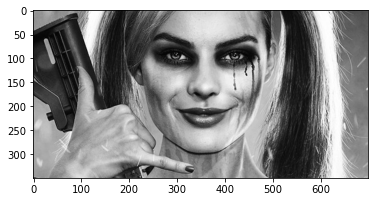

[[147. 147. 147. ...  84.  85.  85.]
 [146. 146. 146. ...  84.  84.  84.]
 [147. 146. 144. ...  83.  82.  82.]
 ...
 [132. 138. 154. ... 179. 178. 173.]
 [ 20.  41.  75. ... 189. 175. 159.]
 [ 97.  81.  58. ... 193. 169. 146.]]


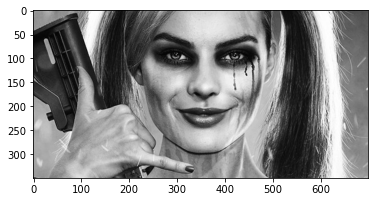

[[147. 147. 147. ...  84.  85.  85.]
 [146. 146. 146. ...  84.  84.  84.]
 [147. 146. 144. ...  83.  82.  82.]
 ...
 [132. 138. 154. ... 179. 178. 173.]
 [ 20.  41.  75. ... 189. 175. 159.]
 [ 97.  81.  58. ... 193. 169. 146.]]
max value in diff:  0.0


In [17]:
G0 = cv2.imread('black.jpg', 0).astype('float32')
print(G0.shape)

plt.imshow(G0, 'gray')
plt.show()

print(G0)

######################### pyrDown ########################################
G1 = cv2.pyrDown(G0)
G2 = cv2.pyrDown(G1)

######################### laplacian ########################################
size = (G1.shape[1], G1.shape[0])
#L1 = cv2.subtract(G1, cv2.pyrUp(G2, dstsize=size))
L1 = G1 - cv2.pyrUp(G2, dstsize=size)

size = (G0.shape[1], G0.shape[0])
#L0 = cv2.subtract(G0, cv2.pyrUp(G1, dstsize=size))
L0 = G0 - cv2.pyrUp(G1, dstsize=size)

######################### reconstruction ########################################
size = (L1.shape[1], L1.shape[0])
#reconst = cv2.add(L1, cv2.pyrUp(G2, dstsize=size))
reconst_g1 = L1 + cv2.pyrUp(G2, dstsize=size)

size = (L0.shape[1], L0.shape[0])
#reconst = cv2.add(L0, cv2.pyrUp(reconst, dstsize=size))
reconst_g0 = L0 + cv2.pyrUp(reconst_g1, dstsize=size)

plt.imshow(reconst_g0, 'gray')
plt.show()

print(reconst_g0)
######################### check difference ########################################
diff = np.amax(G0 - reconst_g0)

print('max value in diff: ', diff)

nlevels of g_pyr: 4
nlevels of lap_pyr: 4
lap_pyr.shape: (350, 700, 3)


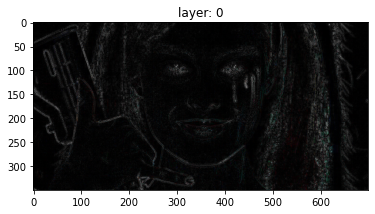

lap_pyr.shape: (175, 350, 3)


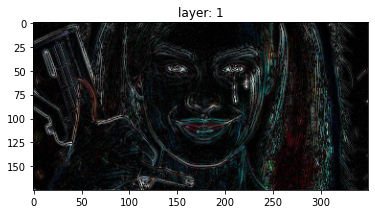

lap_pyr.shape: (88, 175, 3)


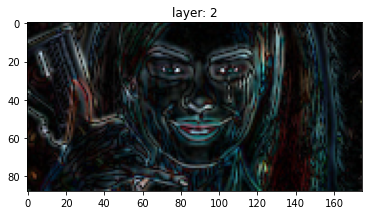

lap_pyr.shape: (44, 88, 3)


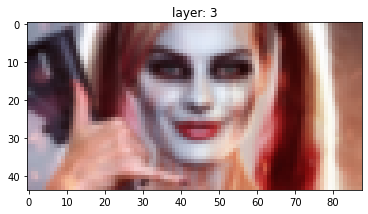

In [19]:
######################### function: buildGaussianPyramid ##########################################
def buildGaussianPyramid(src, maxVals):
    layer = src.copy().astype('float32')   ##### important!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    g_pyr = [layer]
    for i in range(maxVals-1):
        layer = cv2.pyrDown(layer)
        g_pyr.append(layer)
    return g_pyr

######################### function: buildLaplacianPyramid ##########################################
def buildLaplacianPyramid(g_Pyr):
    lap_Pyr = []
    
    levels = len(g_Pyr)
    for i in range(levels-1):
        size = (g_Pyr[i].shape[1], g_Pyr[i].shape[0])
        layer = g_Pyr[i] - cv2.pyrUp(g_Pyr[i+1], dstsize=size)
        lap_Pyr.append(layer)

    lap_Pyr.append(g_Pyr[levels-1])
    return lap_Pyr

######################### work on an image ##########################################
img = cv2.imread('black.jpg')

maxVals = 4
g_pyr = buildGaussianPyramid(img, maxVals)
print('nlevels of g_pyr: ' + str(len(g_pyr)))

lap_pyr = buildLaplacianPyramid(g_pyr)
print('nlevels of lap_pyr: ' + str(len(lap_pyr)))

for i in range(maxVals):
    layer = lap_pyr[i]
    plt.title('layer: '+str(i))
    print('lap_pyr.shape:', layer.shape)
    
    scale_factor = 255.0/np.max(layer)
    layer = cv2.convertScaleAbs(layer, alpha=scale_factor)
    layer = cv2.cvtColor(layer, cv2.COLOR_BGR2RGB)
    plt.imshow(layer)
    plt.show()

nlevels of g_pyr: 4
nlevels of lap_pyr: 4
i: 2
i: 1
i: 0


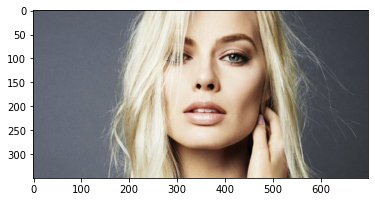

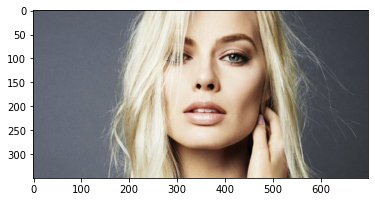

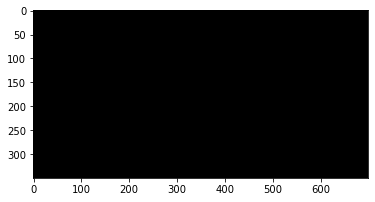

In [20]:
######################### function: buildGaussianPyramid ##########################################
def buildGaussianPyramid(src, maxVals):
    layer = src.copy().astype('float32')   ##### important!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    g_pyr = [layer]
    for i in range(maxVals-1):
        layer = cv2.pyrDown(layer)
        g_pyr.append(layer)
    return g_pyr

######################### function: buildLaplacianPyramid ##########################################
def buildLaplacianPyramid(g_Pyr):
    lap_Pyr = []
    
    levels = len(g_Pyr)
    for i in range(levels-1):
        size = (g_Pyr[i].shape[1], g_Pyr[i].shape[0])
        layer = g_Pyr[i] - cv2.pyrUp(g_Pyr[i+1], dstsize=size)
        lap_Pyr.append(layer)

    lap_Pyr.append(g_Pyr[levels-1])
    return lap_Pyr

######################### build Gaussian and Laplacian Pyramid ##########################################
img = cv2.imread('white.jpg')

maxVals = 4
g_pyr = buildGaussianPyramid(img, maxVals)
print('nlevels of g_pyr: ' + str(len(g_pyr)))

lap_pyr = buildLaplacianPyramid(g_pyr)
nlen_lap_pyr = len(lap_pyr)
print('nlevels of lap_pyr: ' + str(nlen_lap_pyr))

######################### reconstruction ##########################################
reconstruction = lap_pyr[nlen_lap_pyr-1]
for i in range(nlen_lap_pyr-2,-1,-1):
    print('i: '+ str(i))
    size = (lap_pyr[i].shape[1], lap_pyr[i].shape[0])
    reconstruction =  lap_pyr[i] + cv2.pyrUp(reconstruction, dstsize=size)
reconstruction = np.uint8(reconstruction)

scale_factor = 255.0/np.max(reconstruction)
reconstruction = cv2.convertScaleAbs(reconstruction, alpha=scale_factor)
reconstruction_rgb = cv2.cvtColor(reconstruction, cv2.COLOR_BGR2RGB)
plt.imshow(reconstruction_rgb)
plt.show()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

######################### check difference ##########################################
diff = reconstruction_rgb - img_rgb
plt.imshow(diff)
plt.show()

In [49]:
white = cv2.imread('white.jpg').astype('float32')
black = cv2.imread('black.jpg').astype('float32')
mask = cv2.imread('mask.jpg').astype('float32')
# building laplacian pyramids for white and black
maxVals = 4
g_pyr_white = buildGaussianPyramid(white, maxVals)
lap_pyr_white = buildLaplacianPyramid(g_pyr_white)
g_pyr_black = buildGaussianPyramid(black, maxVals)
lap_pyr_black = buildLaplacianPyramid(g_pyr_black)
g_pyr_mask = buildGaussianPyramid(mask, maxVals)

In [50]:
print(lap_pyr_white[1].shape[1], lap_pyr_white[1].shape[0])
print(lap_pyr_white[0].shape[1], lap_pyr_white[0].shape[0])
print(len(lap_pyr_white))

350 175
700 350
4


In [58]:
def blend(laplacian_A,laplacian_B,mask_pyr):
    LS = []
    for la,lb,mask in zip(laplacian_A,laplacian_B,mask_pyr):
        ls = lb * mask + la * (1.0 - mask)
        LS.append(ls)
    return LS

In [59]:
composite = blend(lap_pyr_black,lap_pyr_white,g_pyr_mask)


i: 2
i: 1
i: 0


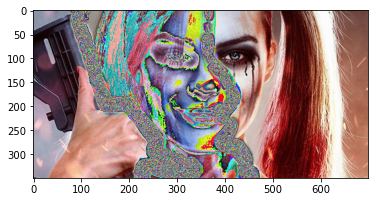

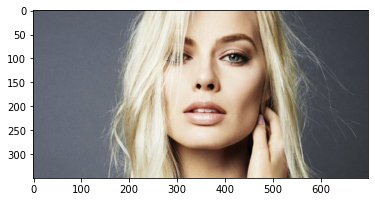

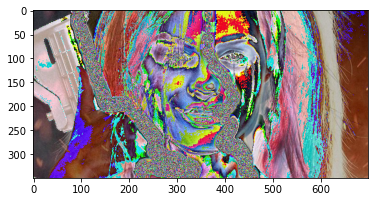

In [60]:
######################### reconstruction ##########################################
nlen_lap_pyr = len(lap_pyr_black)
reconstruction = composite[nlen_lap_pyr-1]
for i in range(nlen_lap_pyr-2,-1,-1):
    print('i: '+ str(i))
    size = (composite[i].shape[1], composite[i].shape[0])
    reconstruction =  composite[i] + cv2.pyrUp(reconstruction, dstsize=size)
reconstruction = np.uint8(reconstruction)

scale_factor = 255.0/np.max(reconstruction)
reconstruction = cv2.convertScaleAbs(reconstruction, alpha=scale_factor)
reconstruction_rgb = cv2.cvtColor(reconstruction, cv2.COLOR_BGR2RGB)
plt.imshow(reconstruction_rgb)
plt.show()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

######################### check difference ##########################################
diff = reconstruction_rgb - img_rgb
plt.imshow(diff)
plt.show()